<a href="https://colab.research.google.com/github/Klein-coder/Hashira-Assignment-/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
%cd /content/drive/MyDrive/SENTIMENT_ANALYSIS

/content/drive/MyDrive/SENTIMENT_ANALYSIS


In [43]:
!ls


IMDB-Dataset.csv


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Loading of data
df=pd.read_csv('/content/drive/MyDrive/SENTIMENT_ANALYSIS/IMDB-Dataset.csv')

In [46]:
#Data cleaning

In [47]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words=stopwords.words('english')
#Loads the default list of English stopwords into the variable stop_words.

new_stopwords=["movie","one","film","would","shall","could","might"]
#Creates a custom list of extra stopwords that are common in your dataset (like movie, film) or weak modal verbs (would, shall).

stop_words.extend(new_stopwords)
#Now stop_words = default NLTK stopwords + your custom list.

stop_words.remove("not")
#Removes "not" from the stopwords list.
#Why? Because in sentiment analysis, “not” is very important (it flips meaning: good → not good).

stop_words=set(stop_words)
#Checking if a word is in a set is much faster than checking in a list.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
#HELPER FUNCTION FOR CLEANING AND PREPROCESSING
import re

# Removing special characters
def remove_special_character(content):
    return re.sub(r'[^a-zA-Z0-9\s]', '', content)

# Removing URLs
def remove_url(content):
    return re.sub(r'http\S+', '', content)

# Removing stopwords from text
def remove_stopwords(content, stop_words):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)


# Expansion of English contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)   # generic rule for "n't"
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'m", " am", content)
    content = re.sub(r"\'ve", " have", content)
    return content



In [49]:
#MAIN PIPELINE
def data_cleaning(content, stop_words):
    content = remove_special_character(content)
    content = remove_url(content)
    content = contraction_expansion(content)
    content = remove_stopwords(content, stop_words)
    return content

In [50]:
#DATA CLEANING
df['Reviews_clean'] = df['Reviews'].apply(lambda x: data_cleaning(x, stop_words))

# Drop the column permanently
df = df.drop(columns=['Resenhas'])

print(df.head())


   Ratings                                            Reviews          Movies  \
0      1.0  *Disclaimer: I only watched this movie as a co...  Disaster Movie   
1      1.0  I am writing this in hopes that this gets put ...  Disaster Movie   
2      1.0  Really, I could write a scathing review of thi...  Disaster Movie   
3      1.0  If you saw the other previous spoof movies by ...  Disaster Movie   
4      1.0  This movie I saw a day early for free and I st...  Disaster Movie   

                                       Reviews_clean  
0  disclaimer watched conditional agreement see f...  
1  writing hopes gets put previous review anyone ...  
2  really write scathing review turd sandwich ins...  
3  saw previous spoof movies two horrible gentlem...  
4  saw day early free still feel like got ripped ...  


In [51]:
display(df.iloc[0]['Reviews_clean'])

'disclaimer watched conditional agreement see films free wouldnt caught dead giving hard earned money idiotswell explain depth write shortest review ever dont see far stupidest lamest lazy unbelievably unfunny ever seen total disaster since hatred others like extends far beyond viewing think ill go biti dont know people besides carmen electra vanessa minnillo kim kardashian doesnt matter theyre horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come filmmaking someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away ill give disaster pass herethe jokes thoughtless mindless physical gags obviously take popular movies last year theres late well including best picture nomineesyou know saddest thing stupid movies dont care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserve atte

In [52]:
df.isna().sum()

,0
Ratings,0
Reviews,0
Movies,25
Reviews_clean,0


In [53]:
df['Ratings'].describe()

,Ratings
count,150000.000000
mean,5.500000
std,2.872291
min,1.000000
25%,3.000000
50%,5.500000
75%,8.000000
max,10.000000


In [54]:
df['Reviews_clean'].describe()

,Reviews_clean
count,150000
unique,149753
top,story
freq,10


In [55]:
print(f"No of unique Reviews : {df['Reviews_clean'].nunique()}")
print(f"No of unique Movies Name : {df['Movies'].nunique()}")
print(f"No of  Rating : {df['Reviews'].nunique()}")

No of unique Reviews : 149753
No of unique Movies Name : 14206
No of  Rating : 149780


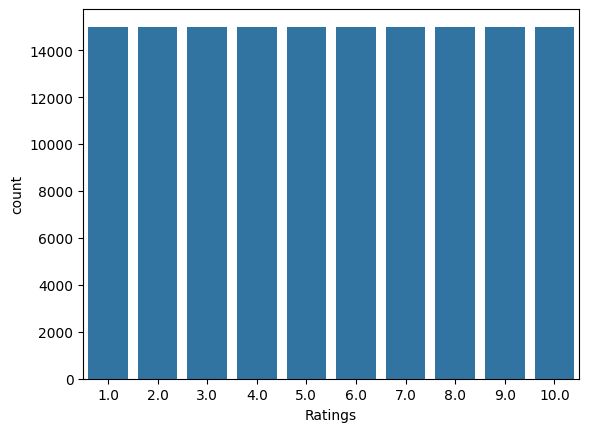

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64


In [56]:
#EDA
#Checking for class imbalance
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())


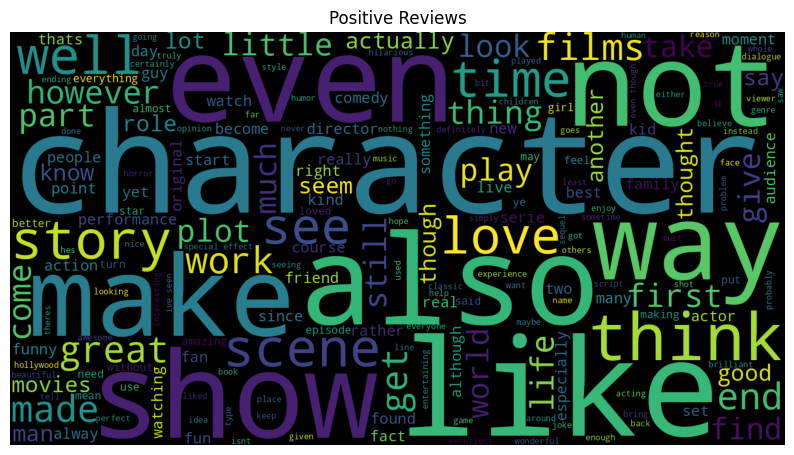

In [57]:
from wordcloud import WordCloud

#Visualization of Important positive words

sentences = df['Reviews_clean']
pos = ' '.join(map(str, sentences[df['Ratings'] >= 7]))
neg = ' '.join(map(str, sentences[df['Ratings'] <= 4]))

pos_wordcloud = WordCloud(
    width=1500,
    height=800,
    background_color='black',
    stopwords=stop_words,
    min_font_size=15
).generate(pos)

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')
plt.show()


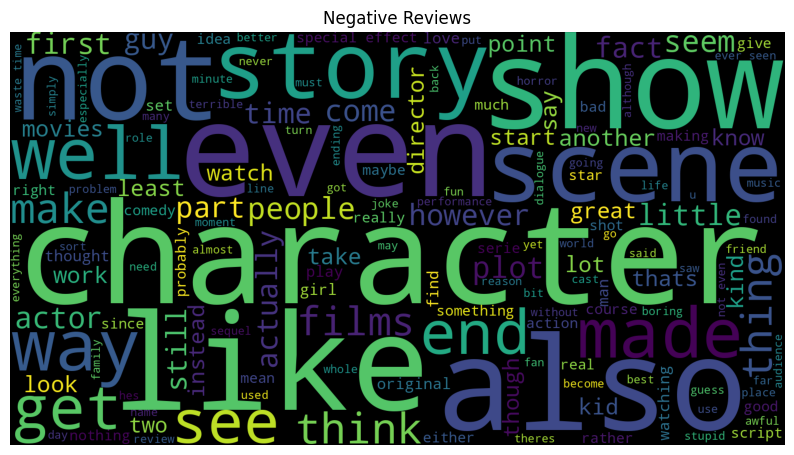

In [58]:
#Visualization of Important Negative words



neg_wordcloud = WordCloud(
    width=1500,
    height=800,
    background_color='black',
    stopwords=stop_words,
    min_font_size=15
).generate(neg)

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show()


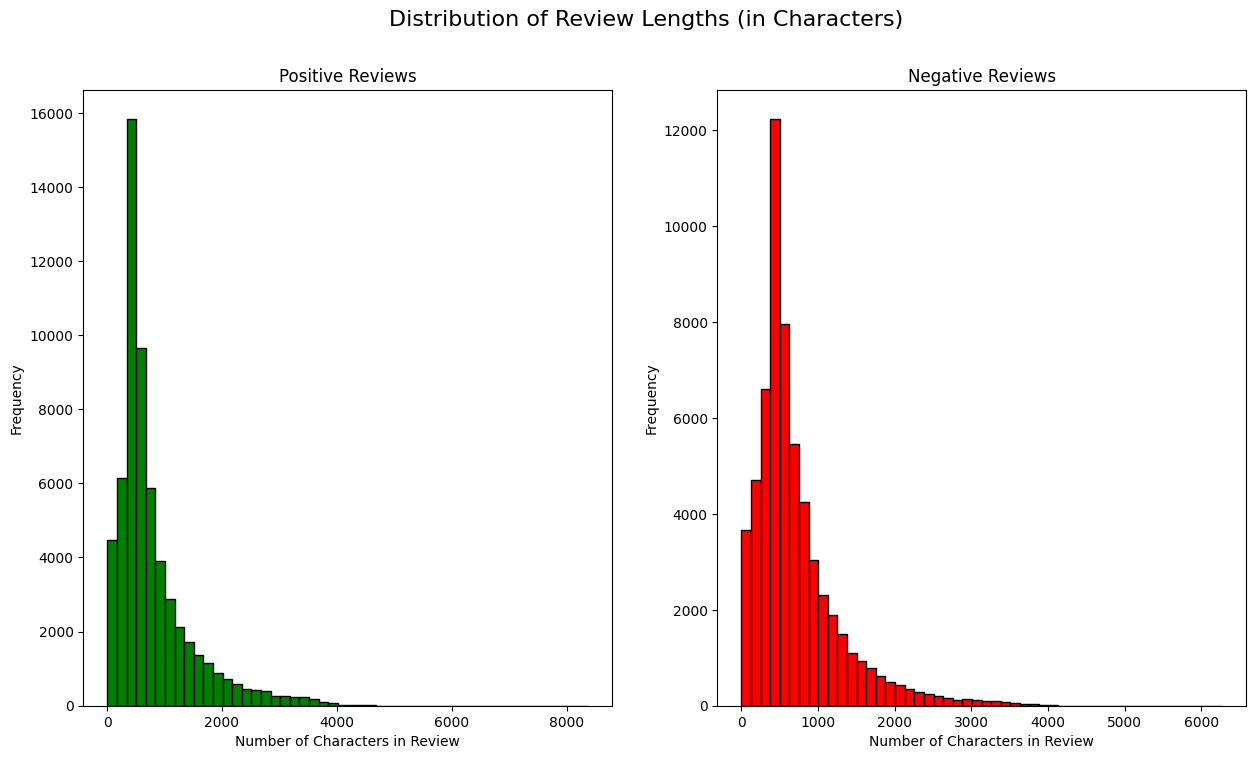

In [59]:
#Visualisation of number character in reviews

# Create subplots: 1 row, 2 columns
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

# Positive reviews (Ratings >= 7)
len_pos_review = df[df['Ratings'] >= 7]['Reviews_clean'].str.len()
pos_ax.hist(len_pos_review, bins=50, color='green', edgecolor='black')
pos_ax.set_title('Positive Reviews')
pos_ax.set_xlabel('Number of Characters in Review')
pos_ax.set_ylabel('Frequency')

# Negative reviews (Ratings <= 4)
len_neg_review = df[df['Ratings'] <= 4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review, bins=50, color='red', edgecolor='black')
neg_ax.set_title('Negative Reviews')
neg_ax.set_xlabel('Number of Characters in Review')
neg_ax.set_ylabel('Frequency')

# Overall title
figure.suptitle('Distribution of Review Lengths (in Characters)', fontsize=16)

plt.show()



/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning:

invalid value encountered in scalar divide



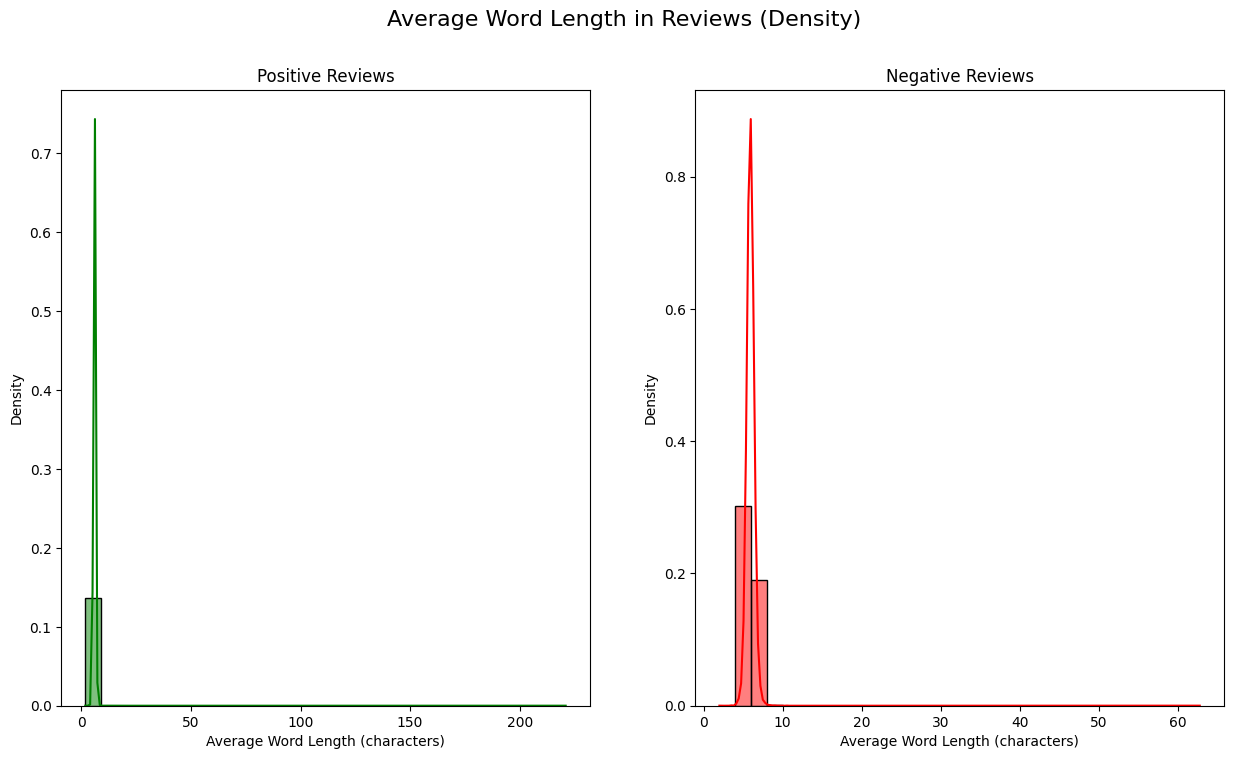

In [60]:
#Visualising avg no of words in review


# Create subplots
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

# --- Positive Reviews ---
pos_word = df[df['Ratings'] >= 7]['Reviews_clean'].str.split().apply(
    lambda x: [len(i) for i in x]
)

sns.histplot(
    pos_word.map(lambda x: np.mean(x)),
    bins=30,
    stat="density",   # <---- density instead of frequency
    kde=True,         # add smooth KDE curve
    ax=pos_ax,
    color='green'
)
pos_ax.set_title('Positive Reviews')
pos_ax.set_xlabel('Average Word Length (characters)')
pos_ax.set_ylabel('Density')

# --- Negative Reviews ---
neg_word = df[df['Ratings'] <= 4]['Reviews_clean'].str.split().apply(
    lambda x: [len(i) for i in x]
)

sns.histplot(
    neg_word.map(lambda x: np.mean(x)),
    bins=30,
    stat="density",   # <---- density
    kde=True,         # smooth KDE curve
    ax=neg_ax,
    color='red'
)
neg_ax.set_title('Negative Reviews')
neg_ax.set_xlabel('Average Word Length (characters)')
neg_ax.set_ylabel('Density')

# Overall Title
figure.suptitle('Average Word Length in Reviews (Density)', fontsize=16)

plt.show()



In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import plotly.express as px

# Function to get top n n-grams
def get_top_text_ngrams(corpus, n=None, g=1):
    # Create a CountVectorizer for unigrams, bigrams, etc.
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)

    # Transform corpus into Bag of Words
    bag_of_words = vec.transform(corpus)

    # Sum word counts across all documents
    sum_words = bag_of_words.sum(axis=0)

    # Extract words and their counts
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]

    # Sort by frequency (descending)
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return words_freq[:n]   # return top n words

In [62]:
# ---- Apply on Positive Reviews ----
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings'] >= 7], 20, 1)

# Convert to dictionary
most_common_uni = dict(most_common_uni)

# Create DataFrame for visualization
temp = pd.DataFrame({
    "Common_words": list(most_common_uni.keys()),
    "Count": list(most_common_uni.values())
})

# Plot with Plotly
fig = px.bar(
    temp,
    x="Count",
    y="Common_words",
    title="Common Words in Positive Reviews",
    orientation='h',
    width=700,
    height=700,
    color="Common_words"
)

fig.show()


In [63]:
# Get top 20 bigrams from positive reviews
most_common_bi = get_top_text_ngrams(df.Reviews_clean[df['Ratings'] >= 7], 20, 2)

# Convert result into dictionary
most_common_bi = dict(most_common_bi)

# Create DataFrame for visualization
temp = pd.DataFrame(columns=['Common_words', 'Count'])
temp['Common_words'] = list(most_common_bi.keys())
temp['Count'] = list(most_common_bi.values())

# Plot with Plotly
fig = px.bar(
    temp,
    x="Count",
    y="Common_words",
    title="Common Bigrams in Positive Reviews",
    orientation='h',
    width=700,
    height=700,
    color="Common_words"
)

fig.show()


In [69]:
# Get top 20 trigrams from positive reviews
most_common_tri = get_top_text_ngrams(df['Reviews_clean'][df['Ratings'] >= 7], 20, 3)

# Convert result into dictionary
most_common_tri = dict(most_common_tri)

# Create DataFrame for visualization
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())

# Plot with Plotly
fig = px.bar(
    temp,
    x="Count",
    y="Common_words",
    title="Common Trigrams in Positive Reviews",
    orientation='h',
    width=700,
    height=700,
    color="Common_words"
)

fig.show()


In [71]:
neg_reviews = df['Reviews_clean'][df['Ratings'] <= 4]

# --- Unigrams (g=1) ---
most_common_uni = get_top_text_ngrams(neg_reviews, 20, 1)
temp_uni = pd.DataFrame(most_common_uni, columns=["Common_words", "Count"])
fig_uni = px.bar(
    temp_uni,
    x="Count", y="Common_words",
    title="Common Unigrams in Negative Reviews",
    orientation="h", width=700, height=700,
    color="Common_words"
)
fig_uni.show()

In [73]:
most_common_bi = get_top_text_ngrams(neg_reviews, 20, 2)
temp_bi = pd.DataFrame(most_common_bi, columns=["Common_words", "Count"])
fig_bi = px.bar(
    temp_bi,
    x="Count", y="Common_words",
    title="Common Bigrams in Negative Reviews",
    orientation="h", width=700, height=700,
    color="Common_words"
)
fig_bi.show()


In [72]:
most_common_tri = get_top_text_ngrams(neg_reviews, 20, 3)
temp_tri = pd.DataFrame(most_common_tri, columns=["Common_words", "Count"])
fig_tri = px.bar(
    temp_tri,
    x="Count", y="Common_words",
    title="Common Trigrams in Negative Reviews",
    orientation="h", width=700, height=700,
    color="Common_words"
)
fig_tri.show()

In [70]:
#Feature Enginnering
df['Label'] = df['Ratings'].apply(
    lambda x: '1' if x >= 7 else ('0' if x <= 4 else '2')
)
df = df[df.Label < '2']
data = df[['Reviews_clean', 'Label']]
print(data['Label'].value_counts())
print(df.columns)

Label
0    60000
1    60000
Name: count, dtype: int64
Index(['Ratings', 'Reviews', 'Movies', 'Reviews_clean', 'Label'], dtype='object')


In [80]:
import sys, os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download("punkt")       # standard Punkt tokenizer
nltk.download("punkt_tab")   # new requirement in recent NLTK versions
nltk.download("wordnet")     # needed for WordNet lemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
# Lemmatization of word
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()

    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word)
                for word in word_tokenize(reviews)]


In [83]:
#Vectorization FOR UNIGRAM
train, test = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

countvect = CountVectorizer(
    analyzer="word",
    tokenizer=LemmaTokenizer(),
    ngram_range=(1,1),
    min_df=10,
    max_features=500
)
tfidfvect = TfidfVectorizer(
    analyzer="word",
    tokenizer=LemmaTokenizer(),
    ngram_range=(1,1),
    min_df=10,
    max_features=500
)

x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count  = countvect.transform(test['Reviews_clean']).toarray()

x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf  = tfidfvect.transform(test['Reviews_clean']).toarray()

y_train = train['Label']
y_test  = test['Label']



/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [86]:
#Feature Importance using Logistic Regression and with unigram (COUNT VECTORISER)

lgr = LogisticRegression()
lgr.fit(x_train_count, y_train)

accuracy = lgr.score(x_test_count, y_test)
print("Accuracy:", accuracy)

lgr.coef_[0]

importantfeature = PrettyTable(["Feature", "Score"])
i = 0
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i < 200:
        importantfeature.add_row([feature, importance])
        i += 1

print(importantfeature)



Accuracy: 0.8326111111111111
+----------------+------------------------+
|    Feature     |         Score          |
+----------------+------------------------+
|      able      |  0.06285197340602275   |
|   absolutely   |  0.07108616798747545   |
|      act       |  -0.16265072839057088  |
|     acting     |  -0.1728210417804494   |
|     action     |   0.2699392335616745   |
|     actor      |  -0.1337203486660688   |
|    actress     |  -0.14181399470283026  |
|    actually    |  -0.04686283341930252  |
|      add       |  0.040382834660075084  |
|     adult      |  0.08078390527690396   |
|      age       |   0.1046750607170431   |
|     alien      |  -0.07684038501344166  |
|     almost     | -0.009050331472057839  |
|     along      |  0.11475718760796028   |
|    already     |  -0.19846851313597108  |
|      also      |  0.10487023739829816   |
|    although    |  0.18736493761532252   |
|     always     |  0.20869153038879243   |
|    amazing     |   0.8802971057856409   |
|  

In [87]:

##Feature Importance using Logistic Regression and with unigram (TF-IDF VECTORISER)

lgr = LogisticRegression()
lgr.fit(x_train_tfidf, y_train)


print(lgr.score(x_test_tfidf, y_test))


lgr.coef_[0]

importantfeature = PrettyTable(["Feature", "Score"])

i = 0
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i < 100:
        importantfeature.add_row([feature, importance])
        i += 1

print(importantfeature)

0.8335277777777778
+----------------+-----------------------+
|    Feature     |         Score         |
+----------------+-----------------------+
|      able      |   0.2930115963599059  |
|   absolutely   |   0.4794932154679086  |
|      act       |  -1.0871781230199768  |
|     acting     |  -1.5329731686788624  |
|     action     |    2.41515489849234   |
|     actor      |  -1.3075163328006552  |
|    actress     |  -0.8516388728785581  |
|    actually    |  -0.3780276423793717  |
|      add       |  0.19385057655760926  |
|     adult      |   0.7473282498125436  |
|      age       |   0.8614744179486492  |
|     alien      |  -0.32364377048437587 |
|     almost     |  -0.21565902359856728 |
|     along      |   0.753663652951163   |
|    already     |  -1.0859768306416442  |
|      also      |   1.139105444003052   |
|    although    |   1.0962262558529197  |
|     always     |   1.7692499350247906  |
|    amazing     |   4.853153291506862   |
|    american    |  0.4012197037150

In [88]:
#vectorisation for BIGRAM
train, test = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

countvect = CountVectorizer(
    analyzer="word",
    tokenizer=LemmaTokenizer(),
    ngram_range=(2,2),
    min_df=10,
    max_features=500
)
tfidfvect = TfidfVectorizer(
    analyzer="word",
    tokenizer=LemmaTokenizer(),
    ngram_range=(2,2),
    min_df=10,
    max_features=500
)

x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count  = countvect.transform(test['Reviews_clean']).toarray()

x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf  = tfidfvect.transform(test['Reviews_clean']).toarray()

y_train = train['Label']
y_test  = test['Label']




/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [89]:
##Feature Importance using Logistic Regression and with Bigram (COUNT VECTORISER)
lgr = LogisticRegression()
lgr.fit(x_train_count, y_train)

print(lgr.score(x_test_count, y_test))

lgr.coef_[0]

importantfeature = PrettyTable(["Feature", "Score"])
i = 0
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i < 50:
        importantfeature.add_row([feature, importance])
        i = i + 1

print(importantfeature)



0.721
+--------------------+----------------------+
|      Feature       |        Score         |
+--------------------+----------------------+
| absolutely nothing | -1.5301366832658416  |
|   academy award    |  0.8433069211679454  |
|      act like      | -0.5122924733338449  |
|     acting bad     | -1.4691953661973507  |
|    acting good     |  0.6447383977063558  |
|    acting great    |  1.4156439602953454  |
|     acting not     | -0.3910242305866066  |
|    action flick    | 0.24343436163827573  |
|    action movie    |  0.5567345568521181  |
|    action scene    | 0.17916508074258575  |
|  action sequence   | 0.16821852024029527  |
|   actor actress    | -0.14416567892205165 |
|     actor not      | -0.16862168120172655 |
|  actually pretty   | -0.07874136999145737 |
|   actually quite   | -0.11412647460431363 |
|    adam sandler    | 0.27543229200017844  |
|    almost every    | -0.11991898839066675 |
|     along way      |  0.5327831585132572  |
|     also good      |   1.0

In [90]:
##Feature Importance using Logistic Regression and with Bigram (TF-IDF VECTORISER)
lgr = LogisticRegression()
lgr.fit(x_train_tfidf, y_train)

print(lgr.score(x_test_tfidf, y_test))

lgr.coef_[0]

importantfeature = PrettyTable(["Feature", "Score"])
i = 0
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i < 50:
        importantfeature.add_row([feature, importance])
        i = i + 1

print(importantfeature)


0.72125
+--------------------+-----------------------+
|      Feature       |         Score         |
+--------------------+-----------------------+
| absolutely nothing |   -2.909951142244489  |
|   academy award    |   1.5620480990943355  |
|      act like      |  -1.0997594888726352  |
|     acting bad     |   -2.917020254652345  |
|    acting good     |   1.2402713638885212  |
|    acting great    |   2.3865848626891135  |
|     acting not     |  -0.9493681744652896  |
|    action flick    |   0.6023492142029964  |
|    action movie    |   1.4369826376128538  |
|    action scene    |  0.39442186686343544  |
|  action sequence   |  0.40524732068288183  |
|   actor actress    |  -0.2828675989186663  |
|     actor not      |  -0.2824999446528465  |
|  actually pretty   |  -0.04654121561713137 |
|   actually quite   | -0.052015854944484956 |
|    adam sandler    |   0.8138226719338718  |
|    almost every    |  -0.36136727026817195 |
|     along way      |   1.0902718639530917  |
|    

In [91]:
#vectorisation for TRIGRAM
train, test = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)

countvect = CountVectorizer(
    analyzer="word",
    tokenizer=LemmaTokenizer(),
    ngram_range=(3,3),
    min_df=10,
    max_features=500
)
tfidfvect = TfidfVectorizer(
    analyzer="word",
    tokenizer=LemmaTokenizer(),
    ngram_range=(3,3),
    min_df=10,
    max_features=500
)

x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count  = countvect.transform(test['Reviews_clean']).toarray()

x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf  = tfidfvect.transform(test['Reviews_clean']).toarray()

y_train = train['Label']
y_test  = test['Label']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [92]:
##Feature Importance using Logistic Regression and with Trigram (COUNT VECTORISER)
lgr = LogisticRegression()
lgr.fit(x_train_count, y_train)

print(lgr.score(x_test_count, y_test))

lgr.coef_[0]

importantfeature = PrettyTable(["Feature", "Score"])
i = 0
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i < 50:
        importantfeature.add_row([feature, importance])
        i = i + 1

print(importantfeature)


0.5935277777777778
+-----------------------+----------------------+
|        Feature        |        Score         |
+-----------------------+----------------------+
|     acting not bad    | -0.0638007413472106  |
|    acting not good    | -0.9319941360676001  |
|   acting pretty good  |  0.8455914292006116  |
| acting special effect | -0.6219004797425187  |
|    acting top notch   |  1.9009630253622192  |
|    acting wasnt bad   | -0.5374409666649059  |
|    action set piece   |  1.3098770219328868  |
|   action take place   | 0.04144070798817897  |
|     actor good job    |  0.4125167230537785  |
|    actor great job    |  1.339547743578149   |
|    actor look like    | -1.2204629443835493  |
|    actually not bad   | -0.8725042740453364  |
|  actually pretty good |  0.2476575062474359  |
|  actually quite good  | -0.24832933661816983 |
|   almost every scene  | -0.3402867747583737  |
|   avoid like plague   | -2.3080535621844036  |
|     bad acting bad    |  -2.213233562886359  |
|

In [93]:
lgr = LogisticRegression()
lgr.fit(x_train_tfidf, y_train)

print(lgr.score(x_test_tfidf, y_test))

lgr.coef_[0]

importantfeature = PrettyTable(["Feature", "Score"])
i = 0
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i < 50:
        importantfeature.add_row([feature, importance])
        i = i + 1

print(importantfeature)


0.5934166666666667
+-----------------------+------------------------+
|        Feature        |         Score          |
+-----------------------+------------------------+
|     acting not bad    |  -0.08163232902383825  |
|    acting not good    |  -1.1749000141188222   |
|   acting pretty good  |   0.8792542491834483   |
| acting special effect |  -0.6775787955742333   |
|    acting top notch   |   2.0559232148130615   |
|    acting wasnt bad   |  -0.5808724720321466   |
|    action set piece   |   1.348900859257454    |
|   action take place   | -0.0004947222013629321 |
|     actor good job    |   0.4632398257660201   |
|    actor great job    |   1.4946844569081863   |
|    actor look like    |  -1.2942775359091125   |
|    actually not bad   |  -0.9937698109148417   |
|  actually pretty good |  0.33075285262479487   |
|  actually quite good  |  -0.24144436549166998  |
|   almost every scene  |  -0.39926696231823927  |
|   avoid like plague   |   -2.572357567728802   |
|     bad ac